# Evaluacion de los algoritmos: SVM's (SVC in scikitlearn), con los dataset: <br>
### Dataset Min-Max, entrenado con Tra y convertido de esa manera Test <br>
### Dataset Min-Max, entrenado con tra y convertido; entrenado con Test y convertido 
### Dataset NO normalizado <br>


.- Tiempo <br>
.- Score <br>
.- Matrices de confusión <br>
.- Classification report ( Precision, Recall, f1-score, support)<br>

In [1]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [2]:
clases_binarias=['Normal','Ataque']
#corresponde a 'Normal=0, Ataque=1
clases_5=['dos','normal','probe','r2l','u2r']
#corresponde a dos=0; normal=1, probe=2
#aunque posiblemente de error poque están definidos desde 1 en vez de 0, porque azeem

## Reading the libraries

In [3]:
import itertools
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)#Prueba evaluación y entrenamiento un solo individuo. 
#Vectores completos
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Definicion de la matriz de confusion

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    cm= confussion matriz
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión normalizada")
    else:
        print('Matriz de Confusión')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiquetas Originales')
    plt.xlabel('Etiquetas Predecidas')


In [5]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [6]:
#NSL TESTING LABELS

#Index binary (2 clases)
L_nsl_testing_indexbinary=pd.read_csv("./Final_Datasets/L_nsl_testing_indexbinary.csv")
#Index by Group (5 clases)
L_nsl_testing_indexbygroup=pd.read_csv("./Final_Datasets/L_nsl_testing_indexbygroup.csv")
#Index tipe of attack (42? clases)
L_nsl_testing_indextipeofattack=pd.read_csv("./Final_Datasets/L_nsl_testing_indextipeofattack.csv")


#nsl TRAINING LABELS
# 2 clases
L_nsl_training_indexbinary=pd.read_csv("./Final_Datasets/L_nsl_training_indexbinary.csv")
#Index by Group (5 clases)
L_nsl_training_indexbygroup=pd.read_csv("./Final_Datasets/L_nsl_training_indexbygroup.csv")
#Index tipe of attack (42? clases)
L_nsl_training_indextipeofattack=pd.read_csv("./Final_Datasets/L_nsl_training_indextipeofattack.csv")

# 1) Dataset Min-Max, entrenado con Tra y convertido de esa manera Test <br>

# Reading the Datasets with the labels

In [4]:
#Reading all the cvs
#Nss learning
nsl_training=pd.read_csv('./Final_Datasets/MINMAX_FD_NSL_Tra.csv')
#Nsl testing
nsl_testing=pd.read_csv('./Final_Datasets/MINMAX_FD_NSL_Test.csv')


# SVM's (SVC in scikitLearn)

# 2 clases

In [9]:
from sklearn.svm import SVC
modelo=SVC(kernel='rbf',cache_size=4000, C=10, gamma=0.1, shrinking=1)

In [10]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbinary.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 137.29376816749573 seconds ---


In [11]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 12.036352157592773 seconds ---


In [12]:
print(classification_report(L_nsl_testing_indexbinary, predicciones))

             precision    recall  f1-score   support

          0       0.67      0.98      0.79      9710
          1       0.97      0.63      0.76     12833

avg / total       0.84      0.78      0.78     22543



In [13]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbinary,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbinary,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 17578
Porcentaje de exactitud: 0.779754247438 (accuracy score)


In [14]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbinary,predicciones)
matriz_de_confusion

Matriz de confusion


array([[9498,  212],
       [4753, 8080]])

Matriz de Confusión
[[9498  212]
 [4753 8080]]


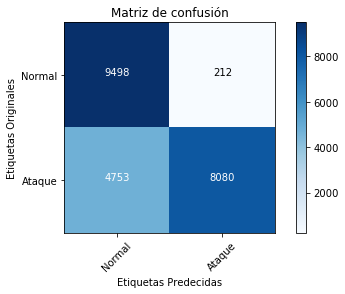

In [15]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión')
plt.show()


Matriz de Confusión normalizada
[[ 0.98  0.02]
 [ 0.37  0.63]]


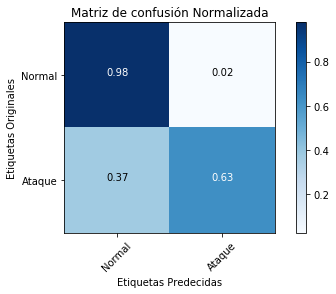

In [16]:
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión Normalizada',
                     normalize=True,)
plt.show()

# 5 clases

In [18]:
from sklearn.svm import SVC
modelo=SVC(kernel='rbf',cache_size=4000, C=10, gamma=0.1, shrinking=1)

In [19]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbygroup.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 92.96311616897583 seconds ---


In [20]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 12.436901092529297 seconds ---


In [21]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.95      0.80      0.87      7458
          2       0.66      0.98      0.79      9710
          3       0.84      0.63      0.72      2421
          4       0.79      0.02      0.03      2754
          5       0.73      0.10      0.17       200

avg / total       0.79      0.76      0.71     22543



In [22]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbygroup,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 17093
Porcentaje de exactitud: 0.758239808366 (accuracy score)


In [23]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbygroup,predicciones)
matriz_de_confusion

Matriz de confusion


array([[5993, 1376,   89,    0,    0],
       [  56, 9510,  130,   10,    4],
       [ 261,  634, 1525,    1,    0],
       [   0, 2685,   20,   46,    3],
       [   0,  130,   50,    1,   19]])

Matriz de Confusión
[[5993 1376   89    0    0]
 [  56 9510  130   10    4]
 [ 261  634 1525    1    0]
 [   0 2685   20   46    3]
 [   0  130   50    1   19]]


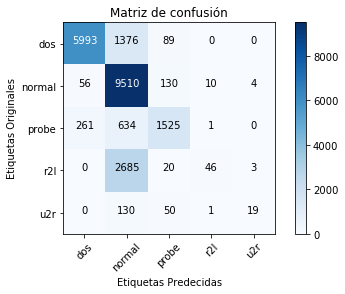

In [24]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión')
plt.show()


Matriz de Confusión normalizada
[[  8.04e-01   1.84e-01   1.19e-02   0.00e+00   0.00e+00]
 [  5.77e-03   9.79e-01   1.34e-02   1.03e-03   4.12e-04]
 [  1.08e-01   2.62e-01   6.30e-01   4.13e-04   0.00e+00]
 [  0.00e+00   9.75e-01   7.26e-03   1.67e-02   1.09e-03]
 [  0.00e+00   6.50e-01   2.50e-01   5.00e-03   9.50e-02]]


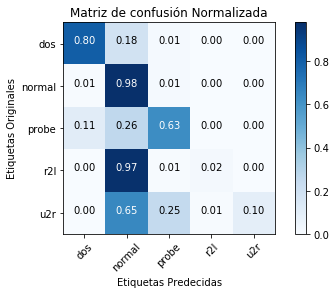

In [25]:
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión Normalizada',
                     normalize=True,)
plt.show()

In [26]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.95      0.80      0.87      7458
          2       0.66      0.98      0.79      9710
          3       0.84      0.63      0.72      2421
          4       0.79      0.02      0.03      2754
          5       0.73      0.10      0.17       200

avg / total       0.79      0.76      0.71     22543



In [27]:

print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Porcentaje de exactitud: 0.758239808366 (accuracy score)


# 2) Dataset Min-Max, entrenado con tra y convertido; entrenado con Test y convertido 

# Reading the Datasets with the labels

In [6]:
#Reading all the cvs
#Nss learning
nsl_training=pd.read_csv('./Datasets_for_evaluation/Min_Max_Entrenado_Tra_Y_Test_No_Parametro_comun/MINMAX_TRATEST_NSL_Tra.csv')
#Nsl testing
nsl_testing=pd.read_csv('./Datasets_for_evaluation/Min_Max_Entrenado_Tra_Y_Test_No_Parametro_comun/MINMAX_TRATEST_NSL_Test.csv')


# SVM's (SVC in scikitLearn)

# 2 clases

In [7]:
from sklearn.svm import SVC
modelo=SVC(kernel='rbf',cache_size=4000, C=10, gamma=0.1, shrinking=1)

In [8]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbinary.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 152.10855770111084 seconds ---


In [9]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 12.810021877288818 seconds ---


In [13]:
print(classification_report(L_nsl_testing_indexbinary, predicciones))

             precision    recall  f1-score   support

          0       0.67      0.98      0.79      9710
          1       0.97      0.63      0.76     12833

avg / total       0.84      0.78      0.78     22543



In [16]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbinary,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbinary,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 17563
Porcentaje de exactitud: 0.779088852415 (accuracy score)


In [17]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbinary,predicciones)
matriz_de_confusion

Matriz de confusion


array([[9499,  211],
       [4769, 8064]])

Matriz de Confusión
[[9499  211]
 [4769 8064]]


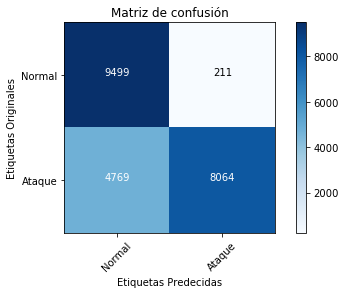

In [18]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión')
plt.show()


Matriz de Confusión normalizada
[[ 0.98  0.02]
 [ 0.37  0.63]]


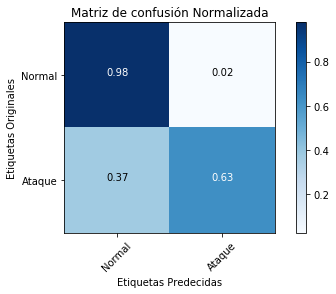

In [19]:
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión Normalizada',
                     normalize=True,)
plt.show()

# 5 clases

In [20]:
from sklearn.svm import SVC
modelo=SVC(kernel='rbf',cache_size=4000, C=10, gamma=0.1, shrinking=1)

In [21]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbygroup.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 89.80692195892334 seconds ---


In [22]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 12.603592872619629 seconds ---


In [23]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.95      0.80      0.87      7458
          2       0.66      0.98      0.79      9710
          3       0.84      0.63      0.72      2421
          4       0.82      0.02      0.03      2754
          5       0.71      0.09      0.15       200

avg / total       0.80      0.76      0.71     22543



In [24]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbygroup,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 17092
Porcentaje de exactitud: 0.758195448698 (accuracy score)


In [25]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbygroup,predicciones)
matriz_de_confusion

Matriz de confusion


array([[6002, 1370,   86,    0,    0],
       [  56, 9513,  130,    7,    4],
       [ 262,  640, 1518,    1,    0],
       [   0, 2688,   21,   42,    3],
       [   0,  132,   50,    1,   17]])

Matriz de Confusión
[[6002 1370   86    0    0]
 [  56 9513  130    7    4]
 [ 262  640 1518    1    0]
 [   0 2688   21   42    3]
 [   0  132   50    1   17]]


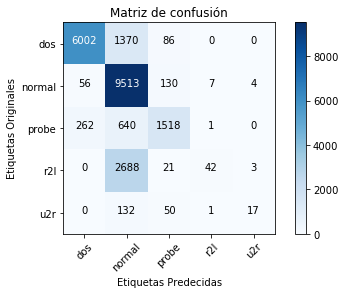

In [26]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión')
plt.show()


Matriz de Confusión normalizada
[[  8.05e-01   1.84e-01   1.15e-02   0.00e+00   0.00e+00]
 [  5.77e-03   9.80e-01   1.34e-02   7.21e-04   4.12e-04]
 [  1.08e-01   2.64e-01   6.27e-01   4.13e-04   0.00e+00]
 [  0.00e+00   9.76e-01   7.63e-03   1.53e-02   1.09e-03]
 [  0.00e+00   6.60e-01   2.50e-01   5.00e-03   8.50e-02]]


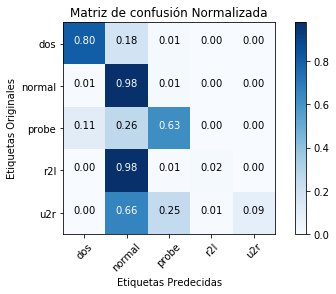

In [27]:
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión Normalizada',
                     normalize=True,)
plt.show()

In [28]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.95      0.80      0.87      7458
          2       0.66      0.98      0.79      9710
          3       0.84      0.63      0.72      2421
          4       0.82      0.02      0.03      2754
          5       0.71      0.09      0.15       200

avg / total       0.80      0.76      0.71     22543



In [29]:

print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Porcentaje de exactitud: 0.758195448698 (accuracy score)


# 3) Dataset NO normalizado

# Reading the Datasets with the labels

In [9]:
#Reading all the cvs
#Nss learning
nsl_training=pd.read_csv('./Datasets_for_evaluation/No_normalizado_total_40_dimension/ORIGINAL_40_DIM_NSL_Tra.csv')
#Nsl testing
nsl_testing=pd.read_csv('./Datasets_for_evaluation/No_normalizado_total_40_dimension/ORIGINAL_40_DIM_NSL_Test.csv')


# SVM's (SVC in scikitLearn)
# se canceló debido al lento entrenamiento. se propone RF

# 2 clases

In [8]:
from sklearn.ensemble import RandomForestClassifier

modelo=RandomForestClassifier(criterion='entropy',n_jobs=2, 
                              bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=2, 
                              min_samples_split=100, n_estimators=8)



In [9]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbinary.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 0.715203046798706 seconds ---


In [10]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 0.11915016174316406 seconds ---


In [11]:
print(classification_report(L_nsl_testing_indexbinary, predicciones))

             precision    recall  f1-score   support

          0       0.66      0.97      0.79      9710
          1       0.97      0.63      0.76     12833

avg / total       0.84      0.78      0.77     22543



In [12]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbinary,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbinary,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 17488
Porcentaje de exactitud: 0.775761877301 (accuracy score)


In [13]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbinary,predicciones)
matriz_de_confusion

Matriz de confusion


array([[9451,  259],
       [4796, 8037]])

Matriz de Confusión
[[9451  259]
 [4796 8037]]


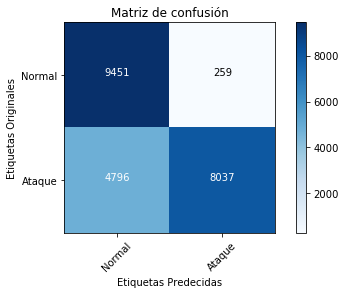

In [14]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión')
plt.show()


Matriz de Confusión normalizada
[[ 0.97  0.03]
 [ 0.37  0.63]]


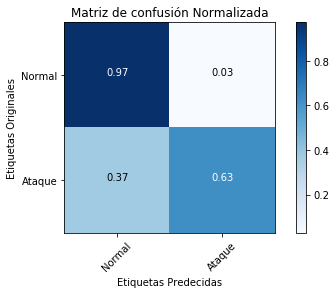

In [15]:
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión Normalizada',
                     normalize=True,)
plt.show()

# 5 clases

In [10]:
from sklearn.ensemble import RandomForestClassifier

modelo=RandomForestClassifier(criterion='entropy',n_jobs=2, 
                              bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=2, 
                              min_samples_split=100, n_estimators=8)



In [11]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbygroup.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 0.7195661067962646 seconds ---


In [12]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 0.11716794967651367 seconds ---


In [13]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.94      0.82      0.88      7458
          2       0.68      0.97      0.80      9710
          3       0.86      0.71      0.78      2421
          4       0.98      0.04      0.08      2754
          5       0.00      0.00      0.00       200

avg / total       0.82      0.77      0.73     22543



/Users/Azeem/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbygroup,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 17381
Porcentaje de exactitud: 0.771015392805 (accuracy score)


In [15]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbygroup,predicciones)
matriz_de_confusion

Matriz de confusion


array([[6101, 1302,   55,    0,    0],
       [  67, 9449,  192,    2,    0],
       [ 294,  414, 1713,    0,    0],
       [   3, 2615,   18,  118,    0],
       [   0,  184,   16,    0,    0]])

Matriz de Confusión
[[6101 1302   55    0    0]
 [  67 9449  192    2    0]
 [ 294  414 1713    0    0]
 [   3 2615   18  118    0]
 [   0  184   16    0    0]]


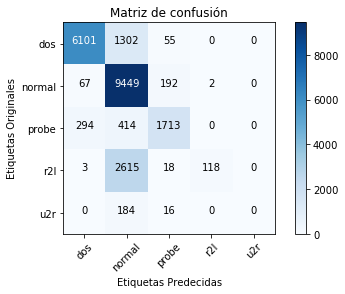

In [16]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión')
plt.show()


Matriz de Confusión normalizada
[[  8.18e-01   1.75e-01   7.37e-03   0.00e+00   0.00e+00]
 [  6.90e-03   9.73e-01   1.98e-02   2.06e-04   0.00e+00]
 [  1.21e-01   1.71e-01   7.08e-01   0.00e+00   0.00e+00]
 [  1.09e-03   9.50e-01   6.54e-03   4.28e-02   0.00e+00]
 [  0.00e+00   9.20e-01   8.00e-02   0.00e+00   0.00e+00]]


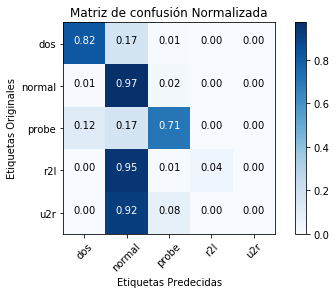

In [17]:
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión Normalizada',
                     normalize=True,)
plt.show()

In [18]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.94      0.82      0.88      7458
          2       0.68      0.97      0.80      9710
          3       0.86      0.71      0.78      2421
          4       0.98      0.04      0.08      2754
          5       0.00      0.00      0.00       200

avg / total       0.82      0.77      0.73     22543



/Users/Azeem/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:

print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Porcentaje de exactitud: 0.771015392805 (accuracy score)
